In [1]:
import pandas as pd

In [2]:
data=pd.read_csv(r"C:\Users\pc\Downloads\Amazon Sales data.csv")

In [3]:
#convert 'Order Date' and 'Ship Date' to datetime
data['Order Date']=pd.to_datetime(data['Order Date'])
data['Ship Date']=pd.to_datetime(data['Ship Date'])

In [4]:
# Extract year and month from 'Order Date'
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month

In [5]:
# Create a year-month column for yearly_month-wise analysis
data['Year_Month'] = data['Order Date'].dt.to_period('M')

In [6]:
# Check for and handle missing values if necessary
data = data.dropna()

In [7]:
# Optionally, create additional columns like 'Revenue' or 'Gross Profit'
data['Revenue'] = data['Units Sold'] * data['Unit Price']

# Analysis
Sales Trend Analysis
We will analyze the sales trends month-wise, year-wise, and yearly-month-wise.

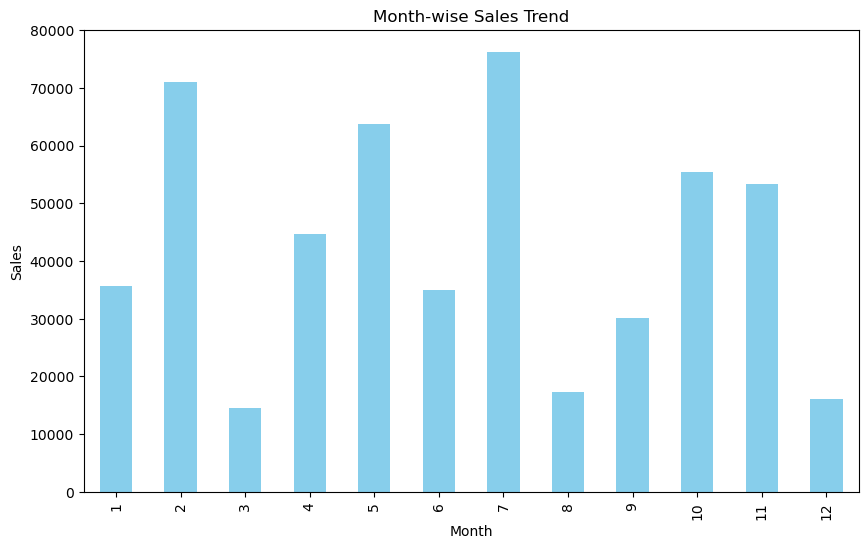

In [8]:
import matplotlib.pyplot as plt

# Month-wise sales trend
month_wise_sales = data.groupby('Order Month')['Units Sold'].sum()
plt.figure(figsize=(10, 6))
month_wise_sales.plot(kind='bar', color='skyblue')
plt.title('Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

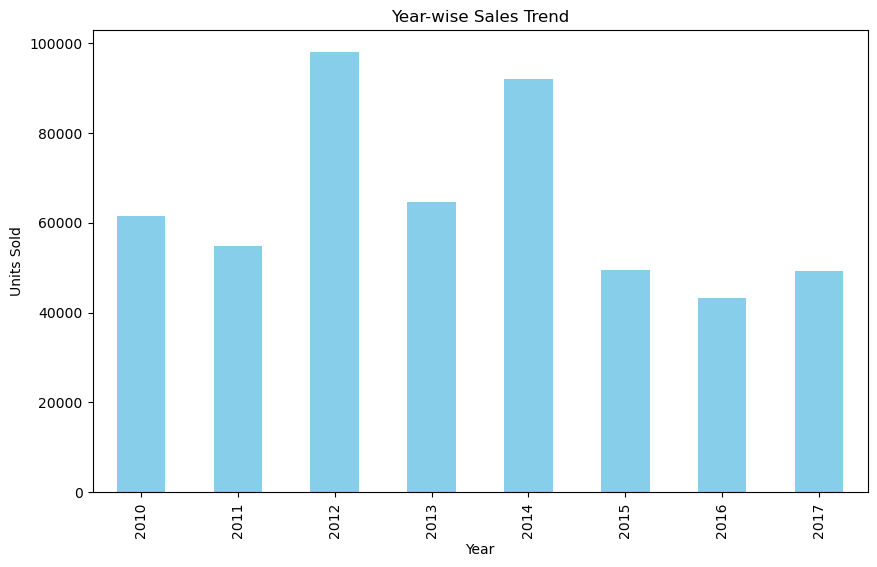

In [9]:
# Year-wise sales trend
year_wise_sales = data.groupby('Order Year')['Units Sold'].sum()
plt.figure(figsize=(10, 6))
year_wise_sales.plot(kind='bar', color='skyblue')
plt.title('Year-wise Sales Trend')
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.show()

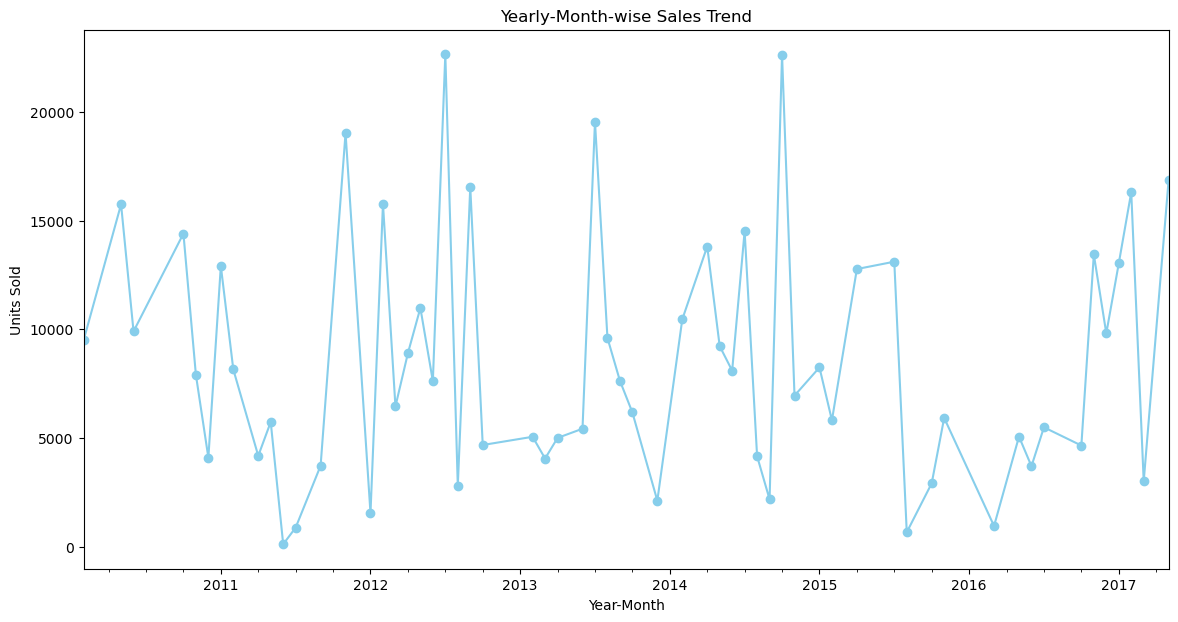

In [10]:
# Yearly-Month-wise sales trend
yearly_month_wise_sales = data.groupby('Year_Month')['Units Sold'].sum()
plt.figure(figsize=(14, 7))
yearly_month_wise_sales.plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly-Month-wise Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.show()

Key Metrics and Relationships
To find key metrics and relationships between attributes, we can use correlation analysis and descriptive statistics.

C:\Users\pc\AppData\Local\Temp\ipykernel_9404\3757211721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


               Order ID  Units Sold  Unit Price  Unit Cost  Total Revenue  \
Order ID       1.000000   -0.222907   -0.190941  -0.213201      -0.314688   
Units Sold    -0.222907    1.000000   -0.070486  -0.092232       0.447784   
Unit Price    -0.190941   -0.070486    1.000000   0.987270       0.752360   
Unit Cost     -0.213201   -0.092232    0.987270   1.000000       0.715623   
Total Revenue -0.314688    0.447784    0.752360   0.715623       1.000000   
Total Cost    -0.328944    0.374746    0.787905   0.774895       0.983928   
Total Profit  -0.234638    0.564550    0.557365   0.467214       0.897327   
Order Year     0.081752    0.012455   -0.061791  -0.071567      -0.037128   
Order Month   -0.111219   -0.007995   -0.031917  -0.042016       0.003835   
Revenue       -0.314688    0.447784    0.752360   0.715623       1.000000   

               Total Cost  Total Profit  Order Year  Order Month   Revenue  
Order ID        -0.328944     -0.234638    0.081752    -0.111219 -0.314688 

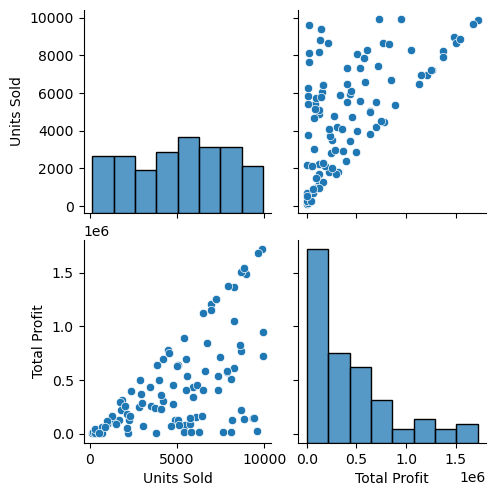

           Order ID   Units Sold  Unit Price   Unit Cost  Total Revenue  \
count  1.000000e+02   100.000000  100.000000  100.000000   1.000000e+02   
mean   5.550204e+08  5128.710000  276.761300  191.048000   1.373488e+06   
std    2.606153e+08  2794.484562  235.592241  188.208181   1.460029e+06   
min    1.146066e+08   124.000000    9.330000    6.920000   4.870260e+03   
25%    3.389225e+08  2836.250000   81.730000   35.840000   2.687212e+05   
50%    5.577086e+08  5382.500000  179.880000  107.275000   7.523144e+05   
75%    7.907551e+08  7369.000000  437.200000  263.330000   2.212045e+06   
max    9.940222e+08  9925.000000  668.270000  524.960000   5.997055e+06   

         Total Cost  Total Profit   Order Year  Order Month       Revenue  
count  1.000000e+02  1.000000e+02   100.000000   100.000000  1.000000e+02  
mean   9.318057e+05  4.416820e+05  2013.230000     6.260000  1.373488e+06  
std    1.083938e+06  4.385379e+05     2.088231     3.353334  1.460029e+06  
min    3.612240e+03 

In [11]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

# Pairplot to visualize relationships
import seaborn as sns
sns.pairplot(data[['Units Sold',  'Sales Channel', 'Total Profit','Item Type']])
plt.show()

# Descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

##Key Metrics
We will calculate total sales, average sales per order

In [22]:
# Key Metrics
total_sales = data['Units Sold'].sum()
average_sales_per_order = data['Units Sold'].mean()
total_Total_cost = data['Total Cost'].sum()
total_profit = data['Total Profit'].sum()

print(f"Total Sales: {total_sales}")
print(f"Average Sales per Order: {average_sales_per_order}")

print(f"Total Profit: ${total_profit:,.2f}")


Total Sales: 512871
Average Sales per Order: 5128.71
Total Profit: $44,168,198.40
